# Title of Project
## Movie Recommendation System

# Objective

To build a movie recommendation system that suggests movies based on a user's favorite movie by analyzing similarities in their features.

# Data Source

The dataset is sourced from the YBI Foundation and contains various attributes of movies, including genre, keywords, tagline, cast, and director. The dataset can be accessed from this [link](https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv).

# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib

# Import Dataset

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')

# Describe Data

In [3]:
print("Information about Dataset: ",df.info())
print("Top 5 rows are: ",df.head())
print("Shape of Dataset: ",df.shape)
print("No. of columns in Dataset: ",df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

# Data Visualization

C:\Users\Umakant Kumar\AppData\Local\Temp\ipykernel_21124\1210191201.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


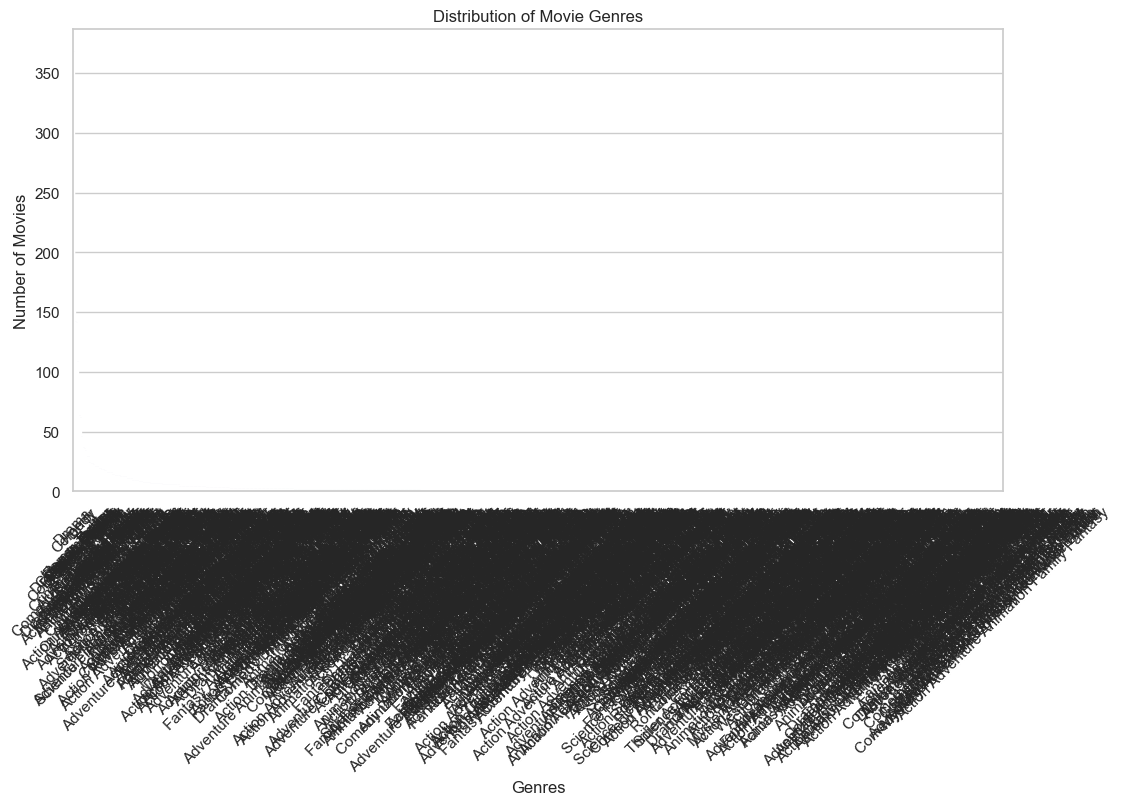

In [4]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 1. Visualizing the Distribution of Movie Genres
plt.figure(figsize=(12, 6))
genre_counts = df['Movie_Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [5]:
df_features = df[['Movie_Genre', 'Movie_Keywords', 'Movie_Tagline', 'Movie_Cast', 'Movie_Director']].fillna('')
x = df_features['Movie_Genre'] + ' ' + df_features['Movie_Keywords'] + ' ' +df_features['Movie_Tagline'] + ' ' + df_features['Movie_Cast'] + ' ' + df_features['Movie_Director']  

# Modeling

cosine_similarity ocmputes the L2-normalized dot product of vectors. Euclidean (L2) normalization projects the vectors onto the unit sphere, and their dot product is then the cosine of the angle between the points denoted bu the vectors.

In [6]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(x)

# Get Similarity Score using Cosine Similarity
Similarity_Score = cosine_similarity(x)

# Model Evaluation

For this type of system, evaluation can be qualitative based on user satisfaction rather than quantitative metrics. You might want to get feedback from users on the recommendations.

# Prediction

In [8]:
# Get Movie Name as Input from User and Validate for Closest Spelling
FavMovName = input("Enter your favourite movie name: ")
MovieTitleList = df['Movie_Title'].tolist()

# Find Close Matches
Movie_Recommendation = difflib.get_close_matches(FavMovName, MovieTitleList)
if not Movie_Recommendation:
    print("No close matches found. Please check the movie name you entered.")
else:
    close_match = Movie_Recommendation[0]
    print(f"Did you mean: {close_match}?")
    
    Index_of_close_match_movie = df[df.Movie_Title == close_match]['Movie_ID'].values[0]
    # getting a list of similar movies
    Recommendation_Score = list(enumerate(Similarity_Score[Index_of_close_match_movie]))
    
    # Sorting the movies based on their similarity score
    Sorted_similar_Movies = sorted(Recommendation_Score, key=lambda x: x[1], reverse=True)
    # Print the name of similar movies based on the index
    print("Top 10 Movies Suggested for you: \n")
    for i, movie in enumerate(Sorted_similar_Movies[:10]):
        index = movie[0]
        title_from_index = df.iloc[index]['Movie_Title']
        print(f"{i + 1} - {title_from_index}")

    

Enter your favourite movie name: wolf of wall street
Did you mean: The Wolf of Wall Street?
Top 10 Movies Suggested for you: 

1 - Below Zero
2 - Terminator 2: Judgment Day
3 - Alpha and Omega: The Legend of the Saw Tooth Cave
4 - Jimmy and Judy
5 - American History X
6 - Deck the Halls
7 - Midnight in Paris
8 - Cat People
9 - Signed, Sealed, Delivered
10 - Mi America


# Explanation

This project leverages the power of Natural Language Processing (NLP) to recommend movies based on the features of movies that a user likes. By using TfidfVectorizer, we convert textual features into numerical representations and then compute cosine similarity to find the closest movies. The system provides recommendations based on the closest match to the user’s input.